In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Importing training data 

In [2]:
mat_train = sc.io.loadmat("train_32x32.mat")
X_dat = mat_train['X']
y_dat = mat_train['y']
y_dat = y_dat % 10

# Converting the data in the required form

In [3]:
x_data = []
for i in range (len(X_dat[0][0][0])):
    temp1 = np.array([])
    temp = X_dat[:,:,:,i]
    temp1 = np.append(temp1,temp).astype(int)
    x_data.append(temp1)       

In [4]:
x_data = np.array(x_data)
x_data.shape

(73257, 3072)

In [5]:
y_data = np.array(y_dat)
y_data.shape

(73257, 1)

# Random sampling of 2500 points from each class

In [6]:
def random_sampling(x, y, num = 2500):
    unique_labels = np.unique(y)
    unique_labels.sort()

    sampled_x = []
    sampled_y = []

    for label in unique_labels:
        indices = np.where(y == label)[0]
        
        sampled_indices = np.random.choice(indices, size=num, replace=False)

        sampled_x.append(x[sampled_indices])
        sampled_y.append(y[sampled_indices])

    sampled_x = np.concatenate(sampled_x, axis=0)
    sampled_y = np.concatenate(sampled_y, axis=0)

    return sampled_x, sampled_y

sampled_x, sampled_y = random_sampling(x_data, y_data, num=2500)

In [7]:
cov_matrix = np.cov(sampled_x.T)
cov_matrix.shape

(3072, 3072)

In [8]:
eig_values , eig_vectors = np.linalg.eig(cov_matrix)

In [9]:
sort = np.argsort(eig_values)
eig_values = eig_values[sort]
eig_vectors = eig_vectors[sort]

In [10]:
eig_values = np.flip(eig_values)
eig_vectors = np.flip(eig_vectors)

In [11]:
total_sum = 0
for i in range (len(eig_values)):
    total_sum = total_sum + eig_values[i]

pre_sum = []
pre_sum.append(eig_values[0])
k = []
k.append(1)
for i in range (1,len(eig_values)):
    pre_sum.append(pre_sum[i-1] + eig_values[i])
    k.append(i+1)

pov = pre_sum/total_sum
    
p = 0   
for i in range (len(eig_values)):
    p += 1
    if (pov[i] > 0.9):
        break
print('number of eigen values such that pov > 0.9 = ', p)   

number of eigen values such that pov > 0.9 =  27


# Plotting Pov against number of eigen vectors

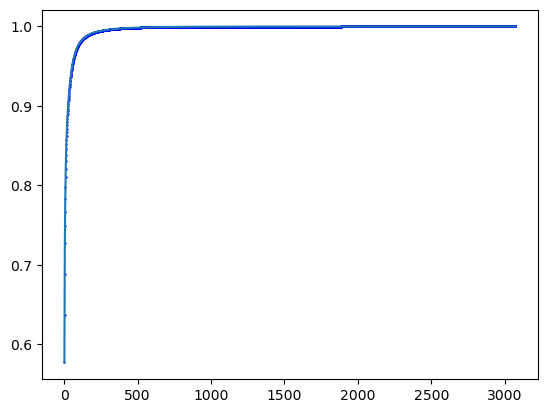

In [12]:
plt.plot(k,pov)
plt.scatter(k,pov,c='blue',s=0.5)
plt.show()

# 1b

In [13]:
pca = PCA(n_components = 10)
projected_x = pca.fit_transform(sampled_x)
projected_x.shape

(25000, 10)

In [14]:
reconstructed_x = np.dot(projected_x , pca.components_)

In [15]:
reconstructed_x.shape

(25000, 3072)

# Reconstructing and visualizing 1 point from each class 

In [16]:
def normalize_reshape(x) :
        min = x[np.argmin(x)]
        max = x[np.argmax(x)]
        x = (x - min)/ (max - min)
        temp = x.reshape(32,32,3)
        return temp

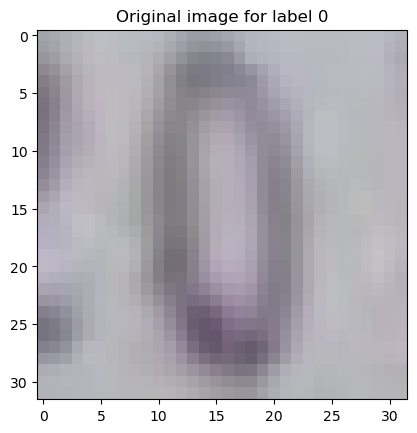

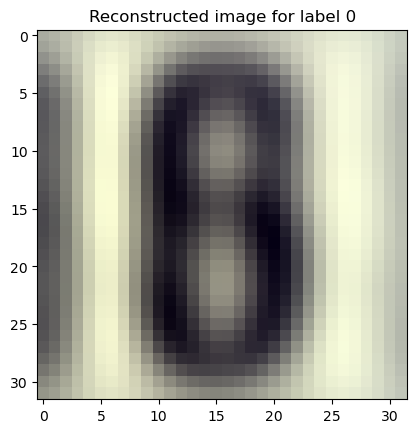

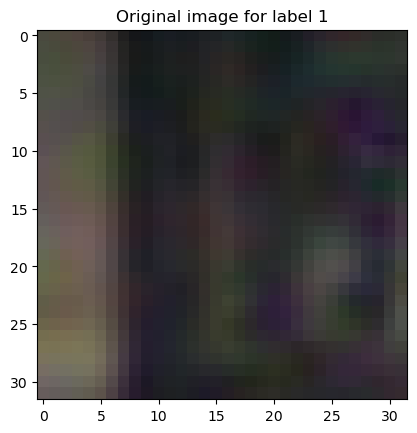

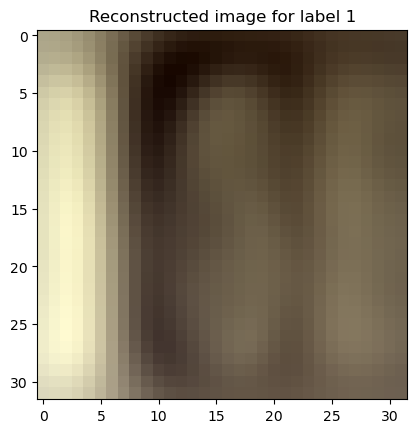

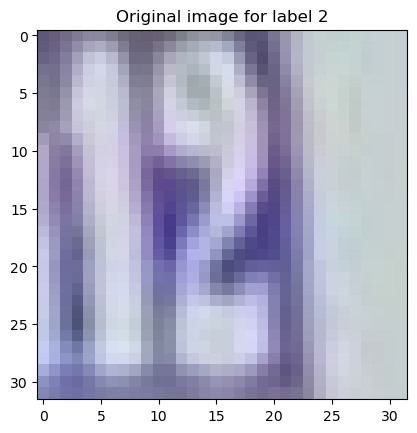

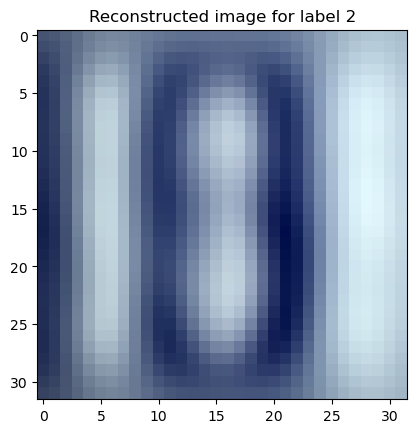

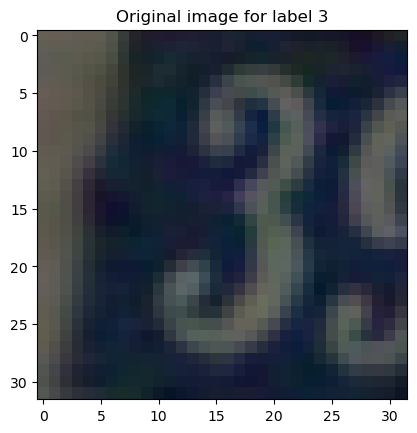

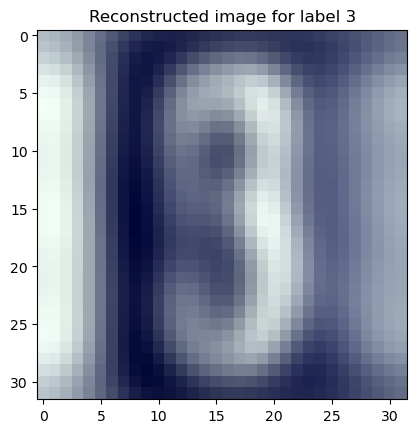

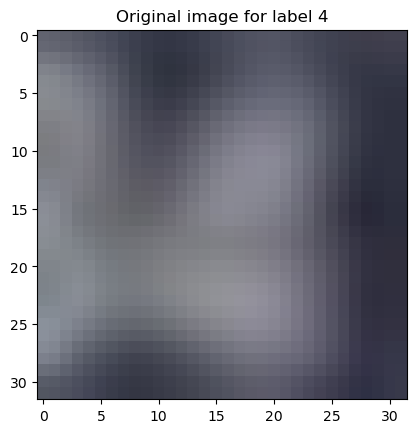

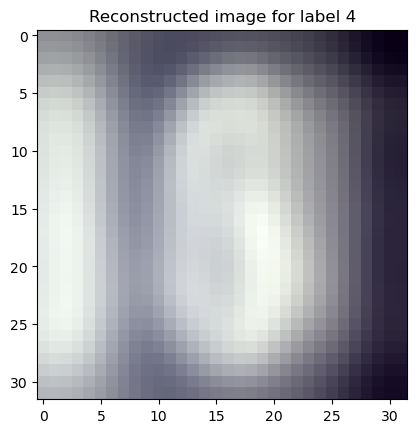

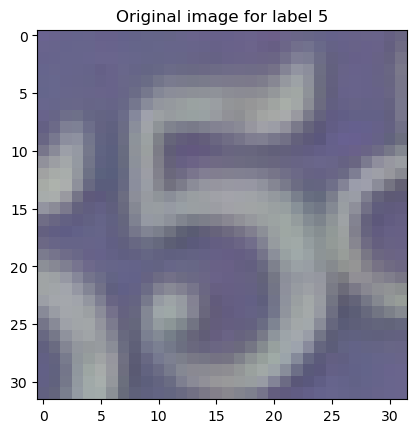

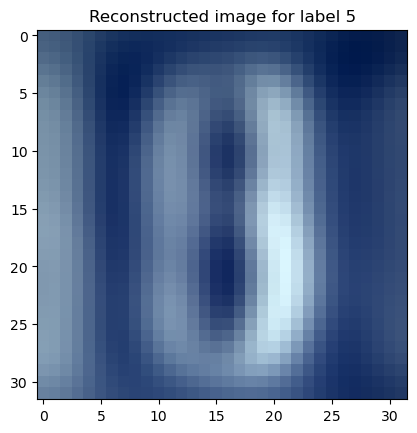

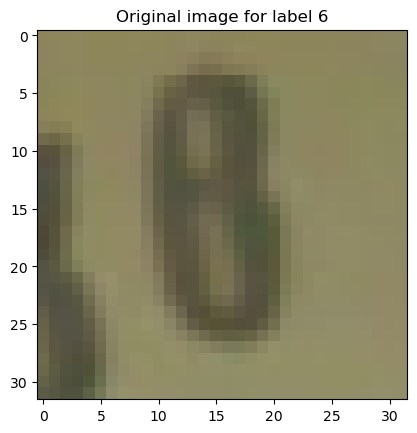

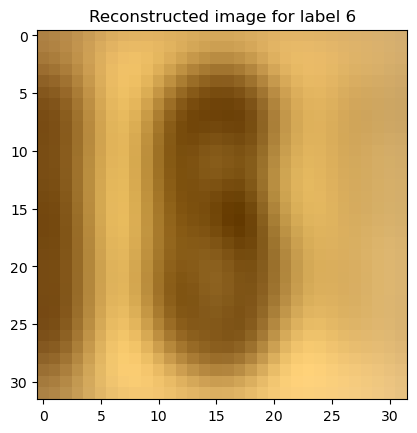

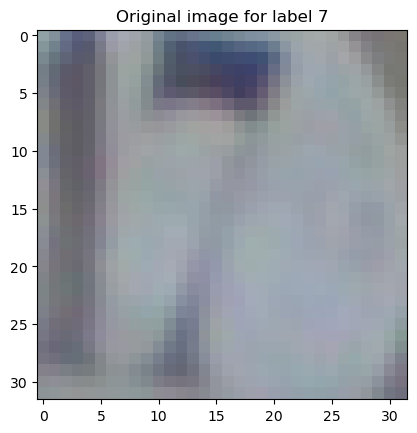

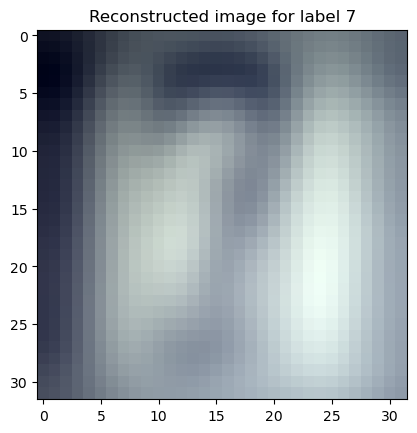

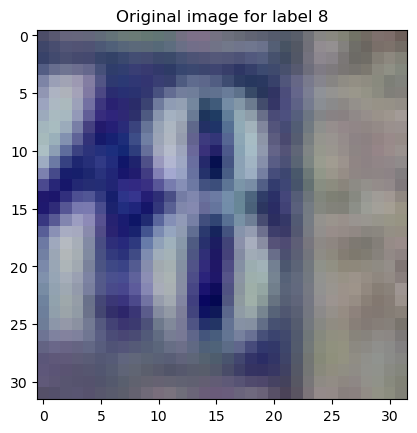

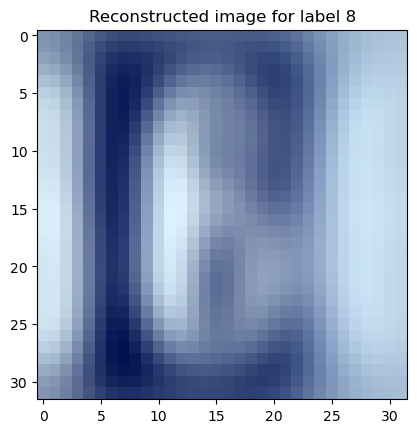

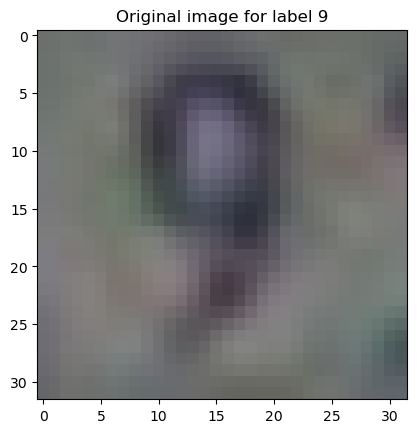

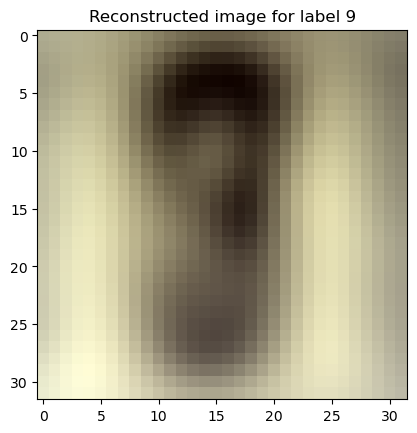

In [17]:
for i in range(10) :
    index = 2500*i + 20
    #   print("Original image for label ", i+1)
    temp = sampled_x[index].reshape(32,32,3)
    plt.title(f"Original image for label {i}")
    plt.imshow(temp)
    plt.show()
#     print("Reconstructed image for label {i + 1}")
    plt.title(f"Reconstructed image for label {i}")
    img = normalize_reshape(reconstructed_x[index])
    plt.imshow(img)
    plt.show()

# Loading the test data

In [18]:
mat_test = sc.io.loadmat("test_32x32.mat")
X_test = mat_test['X']
y_test = mat_test['y']
y_test = y_test % 10

In [19]:
x_test = []
for i in range (len(X_test[0][0][0])):
    temp1 = np.array([])
    temp = X_test[:,:,:,i]
    temp1 = np.append(temp1,temp).astype(int)
    x_test.append(temp1)    

In [20]:
x_test = np.array(x_test)
x_test.shape

(26032, 3072)

In [21]:
y_test = np.array(y_test)
res = sampled_y.flatten()
res.shape

(25000,)

# 1c

In [22]:
import warnings
warnings.filterwarnings("ignore")
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(sampled_x,res)

KNeighborsClassifier()

In [23]:
y_pred = knn.predict(x_test)

In [24]:
accuracy = accuracy_score(y_test , y_pred)
print("The accuracy on raw data for k=5 is ",accuracy)

The accuracy on raw data for k=5 is  0.3981637984019668


In [25]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(sampled_x,res)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test , y_pred)
print("The accuracy on raw data for k=7 is ",accuracy)

The accuracy on raw data for k=7 is  0.4091502765826675


In [26]:
pca = PCA(n_components = p)
pov_projected_x = pca.fit_transform(sampled_x)
reconstructed_pov_projected_x = np.dot(pov_projected_x , pca.components_)
pov_projected_x.shape

(25000, 27)

In [27]:
pca = PCA(n_components = p)
x_test_pov_projected = pca.fit_transform(x_test)
x_test_pov_projected.shape

(26032, 27)

In [28]:
pca = PCA(n_components = 10)
x_test_projected = pca.fit_transform(x_test)
x_test_projected.shape

(26032, 10)

In [29]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(pov_projected_x,res)
y_pred = knn.predict(x_test_pov_projected)
accuracy = accuracy_score(y_test , y_pred)
print("The accuracy on 27 dimensional data for k=5 is ",accuracy)

The accuracy on 27 dimensional data for k=5 is  0.15861247695144437


In [30]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(pov_projected_x,res)
y_pred = knn.predict(x_test_pov_projected)
accuracy = accuracy_score(y_test , y_pred)
print("The accuracy on 27 dimensional data for k=7 is ",accuracy)

The accuracy on 27 dimensional data for k=7 is  0.16176244622003688


In [31]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(projected_x,res)
y_pred = knn.predict(x_test_projected)
accuracy = accuracy_score(y_test , y_pred)
print("The accuracy on 10 dimensional data for k=5 is ",accuracy)

The accuracy on 10 dimensional data for k=5 is  0.14297787338660112


In [32]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(projected_x,res)
y_pred = knn.predict(x_test_projected)
accuracy = accuracy_score(y_test , y_pred)
print("The accuracy on 10 dimensional data for k=7 is ",accuracy)

The accuracy on 10 dimensional data for k=7 is  0.14359250153657038


# 2a

In [33]:
from sklearn.cluster import KMeans
import math
# from sklearn.preprocessing import StandardScaler

In [34]:
kmeans_2a = KMeans(n_clusters=10, random_state=14)

# For raw data

In [35]:
df = pd.DataFrame(sampled_x)
df['cluster_no'] = kmeans_2a.fit_predict(df)
centroids = kmeans_2a.cluster_centers_

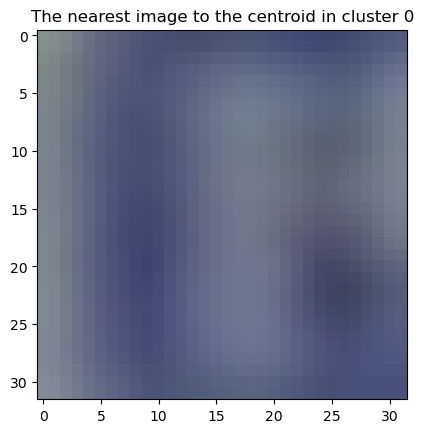

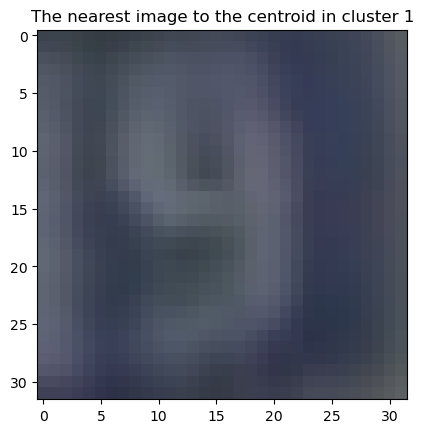

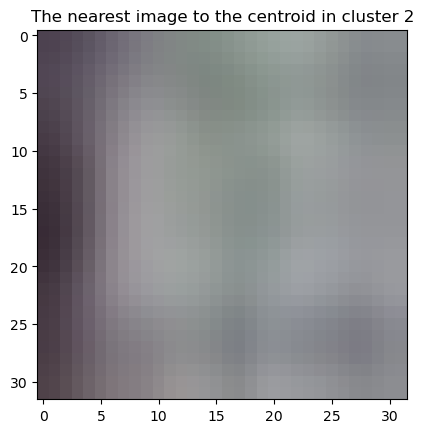

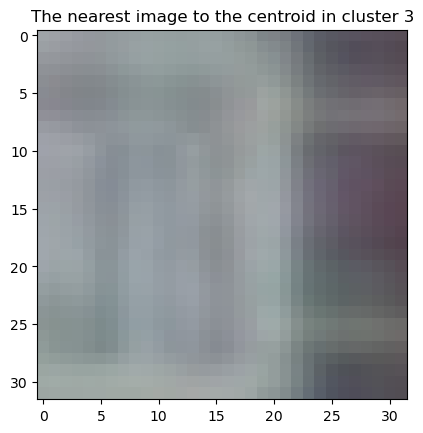

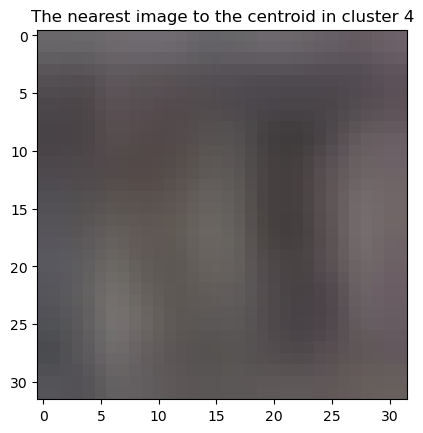

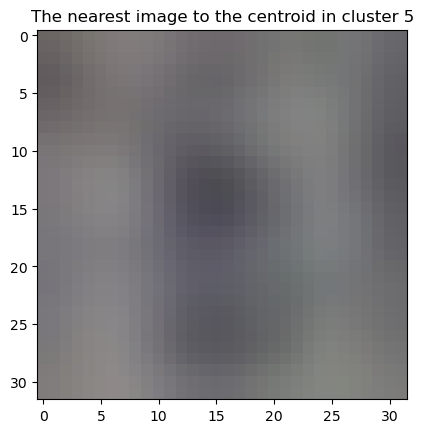

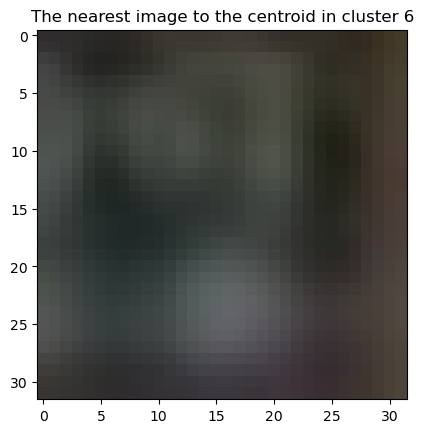

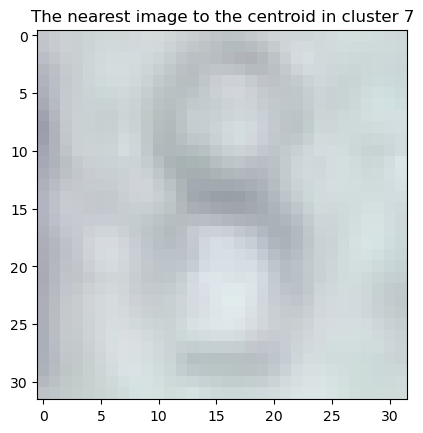

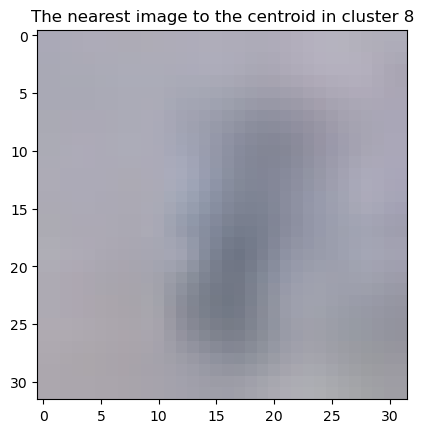

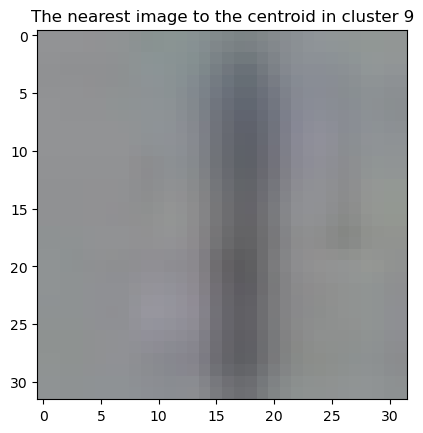

In [36]:
for i in range(10) :
    distance = 1e18
    for j in range (len(sampled_x)) :
        temp = math.dist(centroids[i],sampled_x[j])
        if temp < distance:
            distance = temp
            img_no = j
    img = sampled_x[img_no].reshape(32,32,3)
    plt.imshow(img)
    plt.title(f'The nearest image to the centroid in cluster {i}')
    plt.show()

In [37]:
df['label'] = sampled_y

# Confusion matrix for raw data

In [38]:
from sklearn.metrics import confusion_matrix
# Create a confusion matrix
conf_matrix = confusion_matrix(df['label'], df['cluster_no'])
# Convert the confusion matrix to a DataFrame for better visualization
conf_df = pd.DataFrame(conf_matrix, index=range(10), columns=range(10))
conf_df

,0,1,2,3,4,5,6,7,8,9
0,208,324,33,188,336,403,260,137,263,348
1,191,314,201,101,340,418,304,126,262,243
2,185,318,154,112,327,369,287,149,286,313
3,192,333,132,115,335,398,314,112,256,313
4,239,297,116,112,340,400,279,138,233,346
5,200,337,100,103,336,439,271,125,260,329
6,179,319,85,156,356,418,278,139,248,322
7,161,309,93,139,321,447,328,113,246,343
8,224,333,75,147,332,407,256,132,255,339
9,206,382,75,138,327,408,274,114,248,328


# For 1a data

In [39]:
df_1a = pd.DataFrame(pov_projected_x)
df_1a['cluster_no'] = kmeans_2a.fit_predict(df_1a)
centroids_1a = kmeans_2a.cluster_centers_

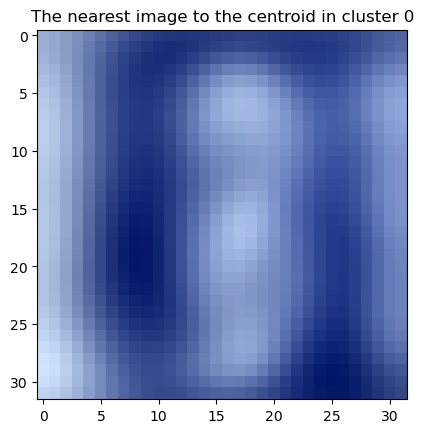

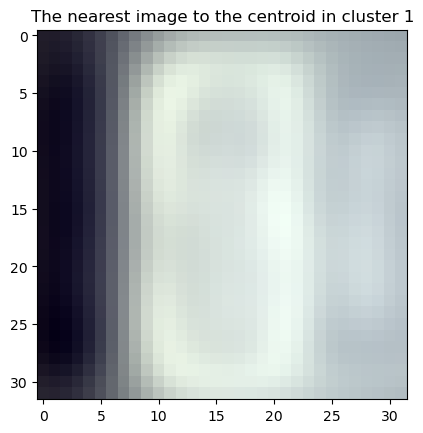

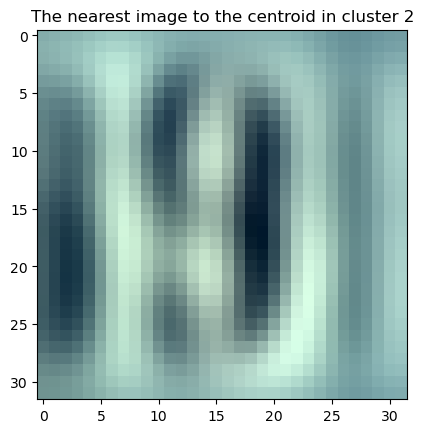

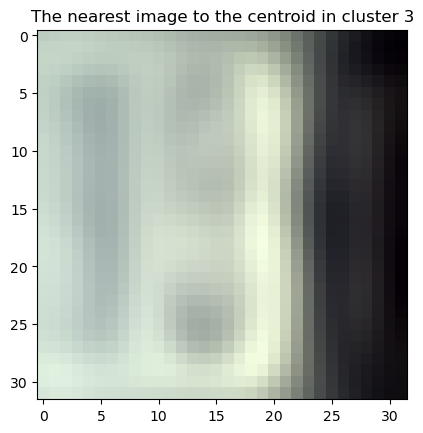

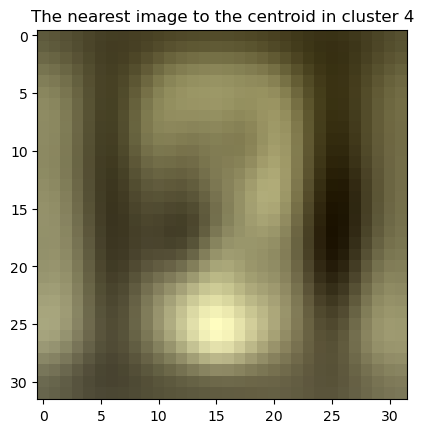

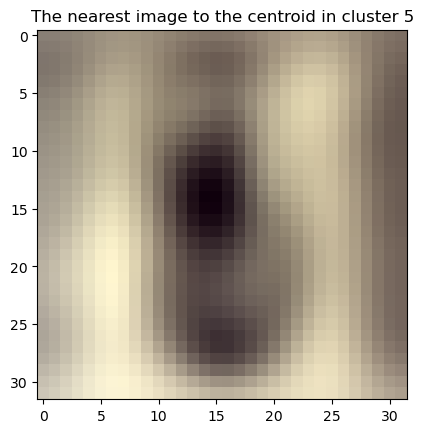

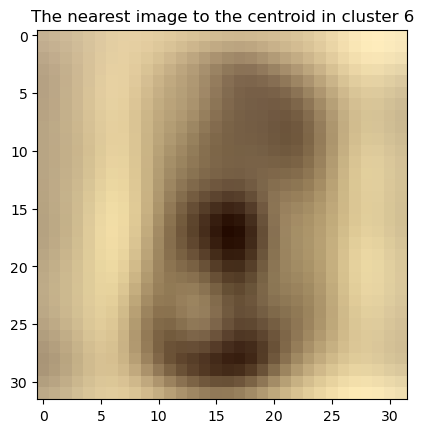

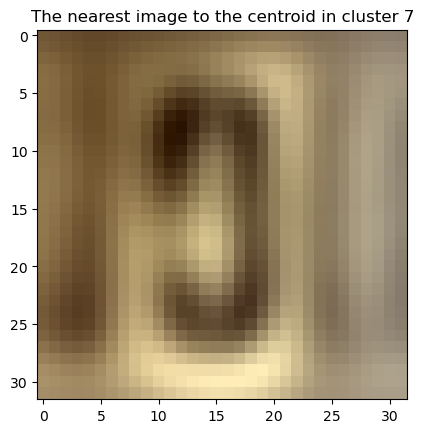

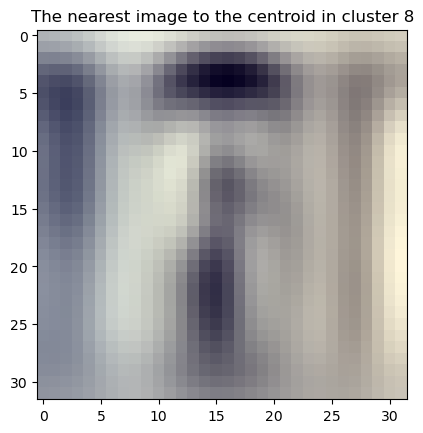

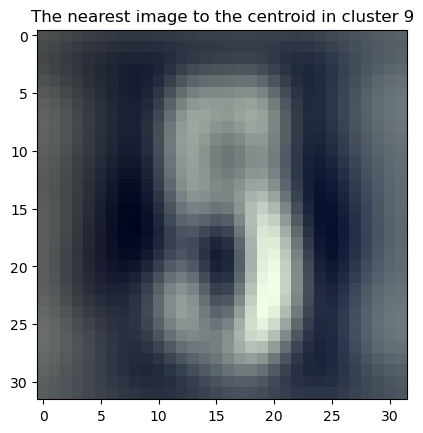

In [40]:
for i in range(10) :
    distance = 1e18
    for j in range (len(pov_projected_x)) :
        temp = math.dist(centroids_1a[i],pov_projected_x[j])
        if temp < distance:
            distance = temp
            img_no = j
        
    img = normalize_reshape(reconstructed_pov_projected_x[img_no])
    plt.imshow(img)
    plt.title(f'The nearest image to the centroid in cluster {i}')
    plt.show()

In [41]:
df_1a['label'] = sampled_y
# Create a confusion matrix
conf_matrix_1a = confusion_matrix(df_1a['label'], df_1a['cluster_no'])
# Convert the confusion matrix to a DataFrame for better visualization
conf_df_1a = pd.DataFrame(conf_matrix_1a, index=range(10), columns=range(10))
conf_df_1a

,0,1,2,3,4,5,6,7,8,9
0,218,39,139,189,254,396,344,348,261,312
1,200,207,129,101,294,407,245,350,257,310
2,204,154,150,110,282,363,317,327,286,307
3,203,133,113,115,302,391,319,341,254,329
4,248,115,139,116,265,397,346,341,233,300
5,212,104,128,104,265,429,328,341,256,333
6,193,87,141,157,276,416,317,358,248,307
7,174,95,117,138,316,433,348,318,241,320
8,246,76,133,150,250,408,334,335,254,314
9,224,80,114,136,264,399,328,331,246,378


# For 10 dimensional data

In [42]:
df_1b = pd.DataFrame(projected_x)
df_1b['cluster_no'] = kmeans_2a.fit_predict(df_1b)
centroids_1b = kmeans_2a.cluster_centers_

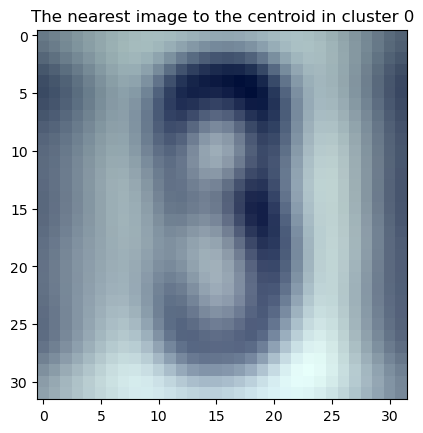

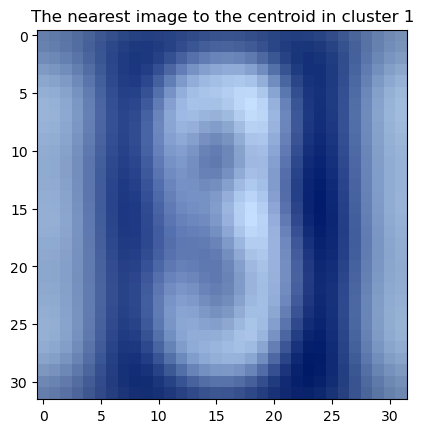

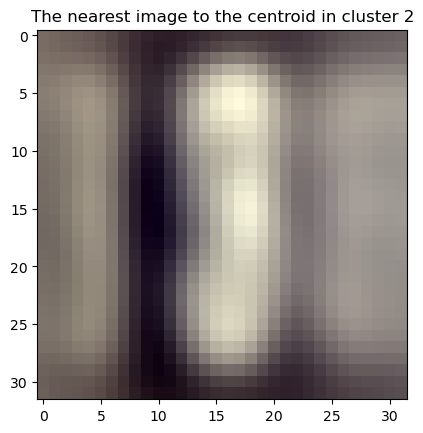

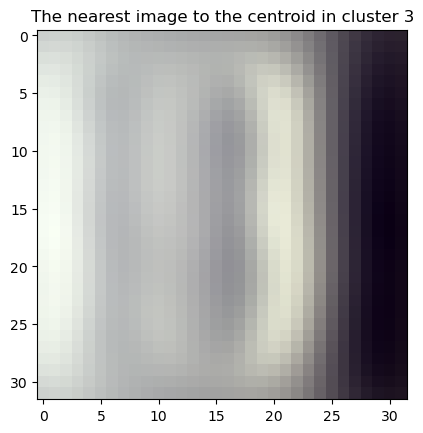

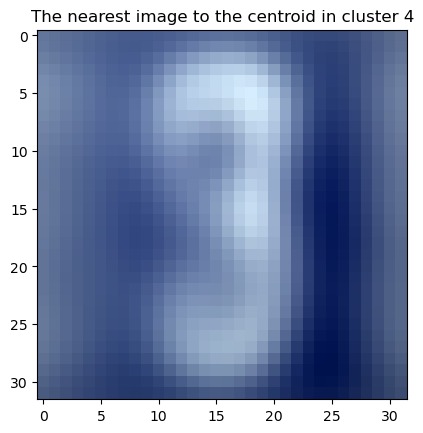

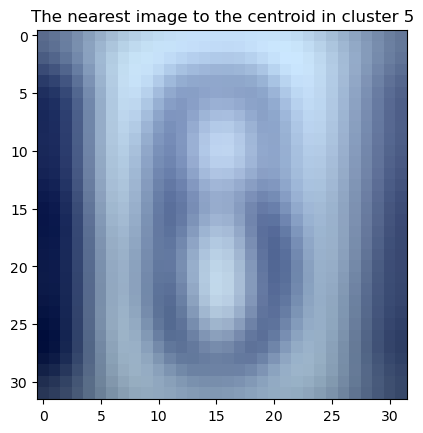

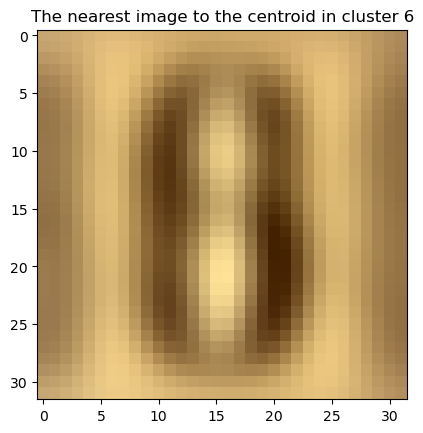

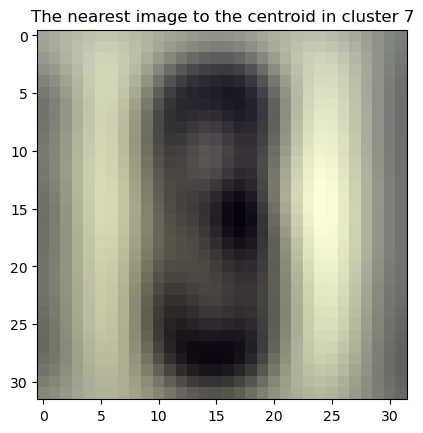

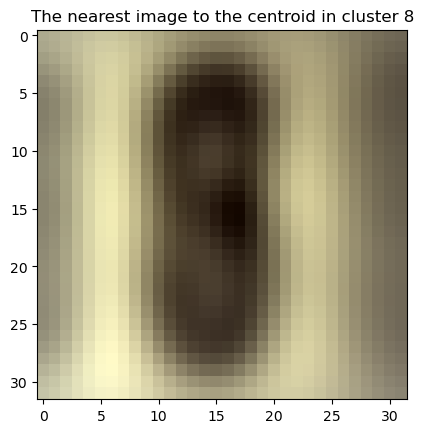

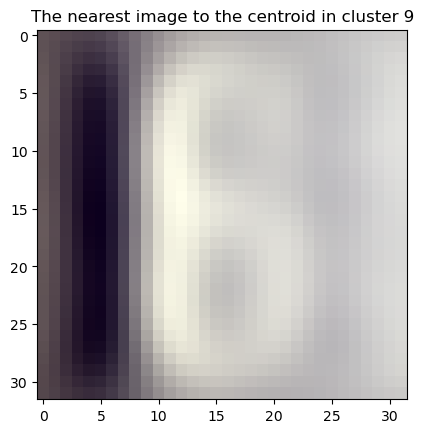

In [43]:
for i in range(10) :
    distance = 1e18
    for j in range (len(projected_x)) :
        temp = math.dist(centroids_1b[i],projected_x[j])
        if temp < distance:
            distance = temp
            img_no = j
        
    img = normalize_reshape(reconstructed_x[img_no])
    plt.imshow(img)
    plt.title(f'The nearest image to the centroid in cluster {i}')
    plt.show()

In [44]:
df_1b['label'] = sampled_y
# Create a confusion matrix
conf_matrix_1b = confusion_matrix(df_1b['label'], df_1b['cluster_no'])
# Convert the confusion matrix to a DataFrame for better visualization
conf_df_1b = pd.DataFrame(conf_matrix_1b, index=range(10), columns=range(10))
conf_df_1b

,0,1,2,3,4,5,6,7,8,9
0,137,218,255,188,314,260,346,345,397,40
1,127,201,294,103,313,258,346,243,410,205
2,149,204,281,112,310,284,327,314,362,157
3,112,202,302,115,331,255,339,317,394,133
4,139,248,263,111,302,233,341,346,397,120
5,126,213,265,106,331,255,342,327,432,103
6,139,194,276,157,307,248,359,318,414,88
7,114,174,314,138,320,242,320,343,440,95
8,132,248,249,148,318,254,334,337,404,76
9,114,226,265,136,378,246,332,329,397,77


# 2b

In [45]:
error = 0
for j in range(len(sampled_x)) :
        i = df.at[j,'cluster_no']
        error += math.dist(centroids[i],sampled_x[j])
print('sum of squares error for raw data = ', error)

sum of squares error for raw data =  42541703.974267885


In [46]:
error = 0
for j in range(len(pov_projected_x)) :
        i = df_1a.at[j,'cluster_no']
        error += math.dist(centroids_1a[i],pov_projected_x[j])
print('sum of squares error for pov = 0.9 dimensional data = ', error)

sum of squares error for pov = 0.9 dimensional data =  37122693.4862406


In [47]:
error = 0
for j in range(len(projected_x)) :
        i = df_1b.at[j,'cluster_no']
        error += math.dist(centroids_1b[i],projected_x[j])
print('sum of squares error for 10 dimensional data = ', error)

sum of squares error for 10 dimensional data =  31731280.70794043


# Evaluating purity and rand index

In [48]:
from sklearn.metrics import adjusted_rand_score
purity = 0
for i in range(10) :
    purity += conf_df[i].max()
purity = purity / len(sampled_x)
print('purity for raw data = ', purity)

true_labels = sampled_y.flatten()
pred_labels = df['cluster_no'].values

rand_score = adjusted_rand_score(true_labels,pred_labels)
print('rand index for raw data= ', rand_score)

purity for raw data =  0.11696
rand index for raw data=  0.0006318686204202403


In [49]:
purity_1a = 0
for i in range(10) :
    purity_1a += conf_df_1a[i].max()
purity_1a = purity_1a / len(pov_projected_x)
print('purity for the data with 0.9 pov dimensions = ', purity_1a)

pred_labels = df_1a['cluster_no'].values

rand_score = adjusted_rand_score(true_labels,pred_labels)
print('rand index for the data with 0.9 pov dimensions = ', rand_score)

purity for the data with 0.9 pov dimensions =  0.11652
rand index for the data with 0.9 pov dimensions =  0.0006062333863135651


In [50]:
purity_1b = 0
for i in range(10) :
    purity_1b += conf_df_1b[i].max()
purity_1b = purity_1b / len(projected_x)
print('purity for 10 dimensional data = ', purity_1b)

pred_labels = df_1b['cluster_no'].values

rand_score = adjusted_rand_score(true_labels,pred_labels)
print('rand index for 10 dimensional data = ', rand_score)

purity for 10 dimensional data =  0.11644
rand index for 10 dimensional data =  0.0006051102970535007


# 2c

In [51]:
#Accuracy is same as purity in the before question

print('The accuracy for raw data = ', purity)
print('The accuracy for the data with 0.9 pov dimensions = ', purity_1a)
print('The accuracy for 10 dimensional data = ', purity_1b)

The accuracy for raw data =  0.11696
The accuracy for the data with 0.9 pov dimensions =  0.11652
The accuracy for 10 dimensional data =  0.11644


# 2d

In [52]:
kmeans_2d = KMeans(n_clusters=5, random_state=14)

In [53]:
df_2d = pd.DataFrame(pov_projected_x)
df_2d['cluster_no'] = kmeans_2d.fit_predict(df_2d)
centroids_2d = kmeans_2d.cluster_centers_

In [54]:
df_2d['label'] = sampled_y

In [55]:
error = 0
for j in range(len(pov_projected_x)) :
        i = df_2d.at[j,'cluster_no']
        error += math.dist(centroids_2d[i],pov_projected_x[j])
print('sum of squares error = ', error)

sum of squares error =  40002370.995218165


In [56]:
# Create a confusion matrix
conf_matrix_2d = confusion_matrix(df_2d['label'], df_2d['cluster_no'])
# print(conf_matrix_2d)
# Convert the confusion matrix to a DataFrame for better visualization
conf_df_2d = pd.DataFrame(conf_matrix_2d, index=range(10), columns=range(10))
conf_df_2d

,0,1,2,3,4,5,6,7,8,9
0,720,448,217,473,642,0,0,0,0,0
1,712,486,197,484,621,0,0,0,0,0
2,673,465,227,530,605,0,0,0,0,0
3,718,509,180,457,636,0,0,0,0,0
4,711,455,211,452,671,0,0,0,0,0
5,713,470,195,441,681,0,0,0,0,0
6,715,466,220,455,644,0,0,0,0,0
7,677,511,170,483,659,0,0,0,0,0
8,714,426,214,458,688,0,0,0,0,0
9,747,483,175,441,654,0,0,0,0,0


# Observations

In [57]:
# 1c
# For Both k = 5 and k = 7 , the accuracy was very similar. And as predicted the accuracy decreases when the 
# dimensions of data decreases

In [58]:
# 2a
# All the clusters have images from all the classes but in most of the clusters there is a dominant class and
# all classes except the class 0 are uniquely dominating in different clusters. Classes 3 and 4 did not dominate
# a single cluster.

In [59]:
# 2c
# The accuracy does not depend on the dimensions that much and is low compared to knn classifier in 1c .

In [60]:
# 2d
# Yes images from different classes are clustered together and all the classes are clustered in every cluster.
# most of the images are present in cluster 0 and 4.